In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import Inference as inf

### ViT Vanilla
- Input: RGBNir + Categorical Information 
- Loss: MSE 
- Evaluation Scenarion: Block-hold-out

In [91]:
ViT_vanilla_train  = pd.read_csv('/data2/hkaman/DiT/EXPs/EXP_vanilla_mse_01_0001_1024_8_6/vanilla_mse_01_0001_1024_8_6_train.csv',  index_col=0) 
ViT_vanilla_valid  = pd.read_csv('/data2/hkaman/DiT/EXPs/EXP_vanilla_mse_01_0001_1024_8_6/vanilla_mse_01_0001_1024_8_6_valid.csv',  index_col=0) 
ViT_vanilla_test  = pd.read_csv('/data2/hkaman/DiT/EXPs/EXP_vanilla_mse_01_0001_1024_8_6/vanilla_mse_01_0001_1024_8_6_test.csv',  index_col=0) 

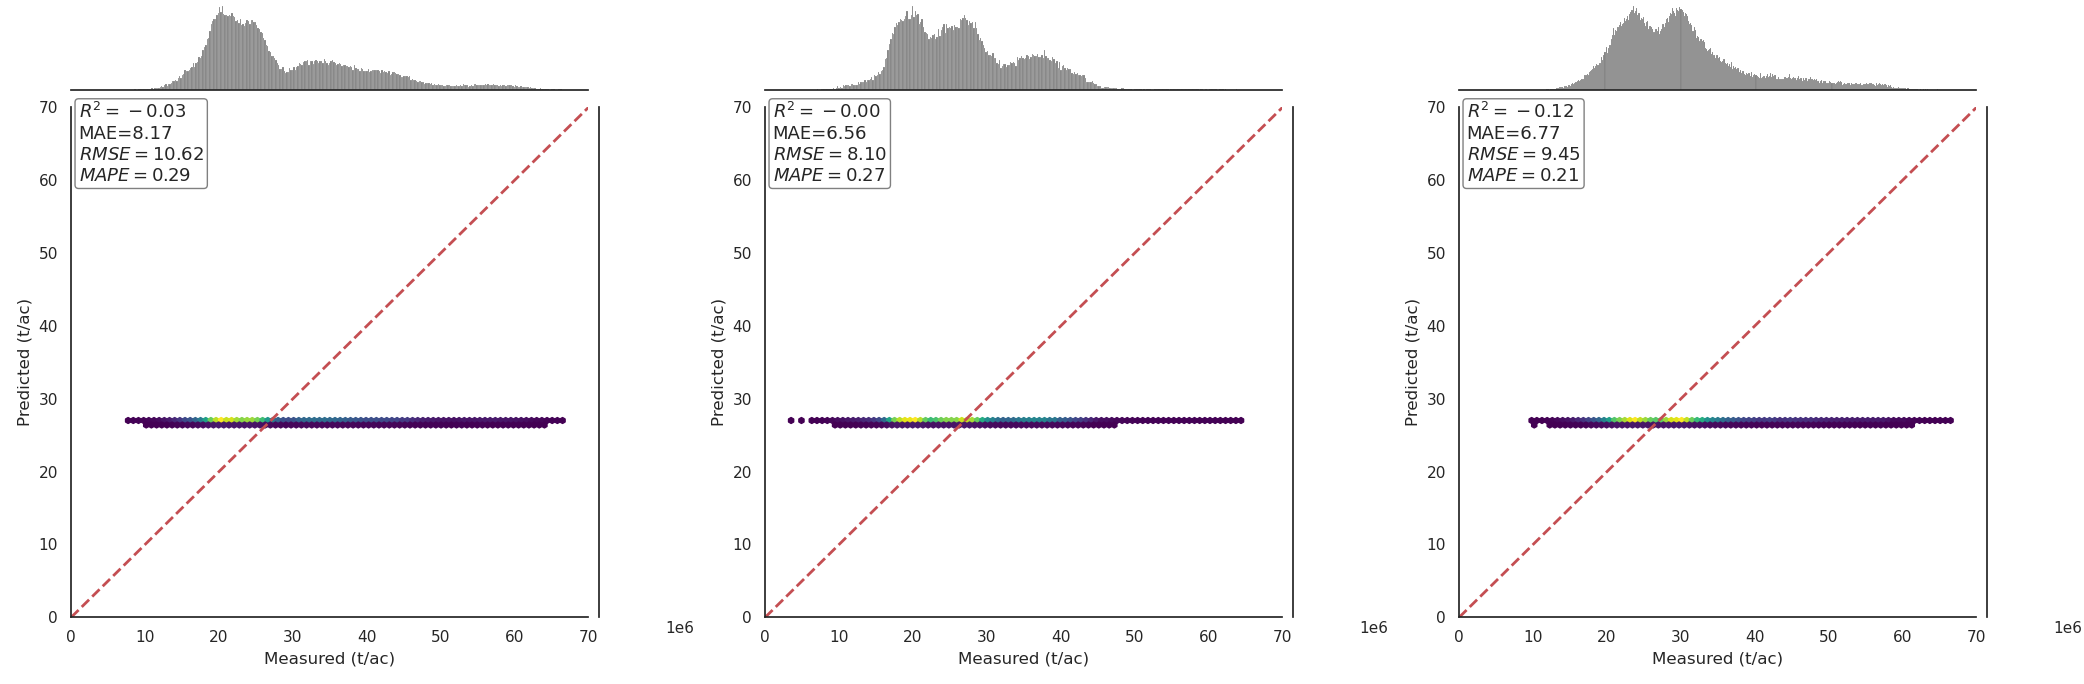

In [58]:
_ = inf.train_val_test_satterplot(ViT_vanilla_train, ViT_vanilla_valid, ViT_vanilla_test, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

In [87]:
RGB_test_cost_sensitive_Output5 = inf.eval_on_three_main_label_range_pred(ViT_vanilla_test, th1 = 9, th2 = 22)

C1 num samples: 253247 | C2 num samples: 2777403 | C3 num samples: 154758 
C1 is yield value between 0 and 9, C2 is yield value between 9 and 22, and C3 is yield value bigger than 22
All: MAE = 3.02, MAPE = 0.21 | C1: MAE = 3.96, MAPE = 51.12 | C2: MAE = 2.42, MAPE = 16.82 | C3: MAE = 12.21, MAPE = 50.20


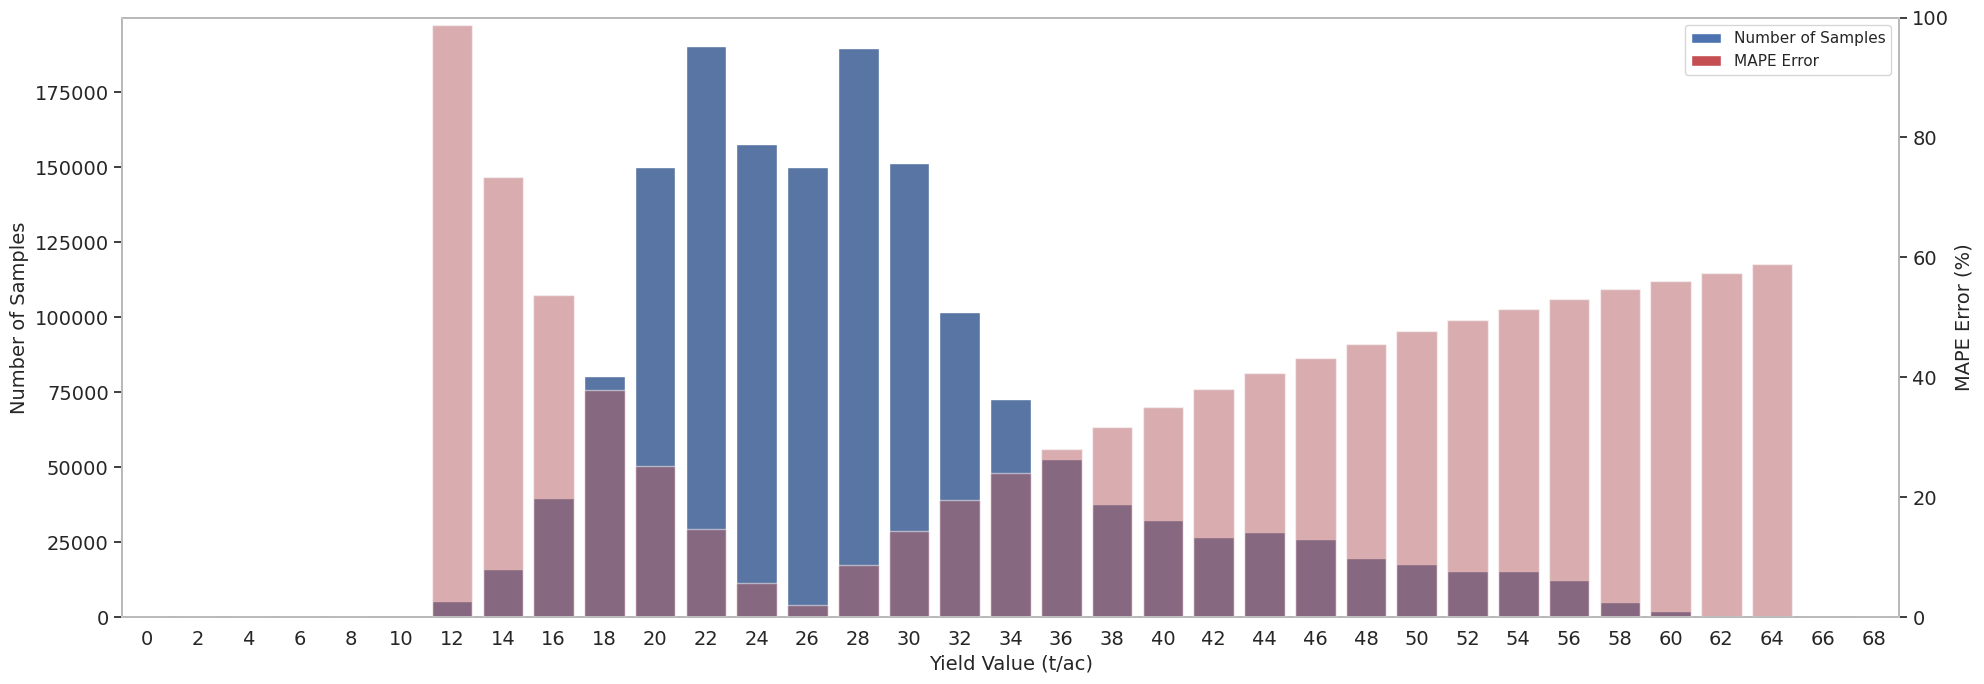

In [63]:
_ = inf._mape_extreme_bin_plot(ViT_vanilla_test)

In [88]:
ViT_vanilla_test['block'].unique()

array([1812016, 1142019,  252018,   52017, 1142017, 1862017,  902016,
        112017, 1142018, 1812018,  262017, 1862019, 1782018,   52018,
        252016, 1812019, 1862016, 1052019, 1352017,  112016, 1052018,
       1812017, 1782016,  902017, 1052017, 1142016, 1352016,  112018,
        622016,  902019, 1352019, 1782019,   52016,  262016, 1782017,
        252017,  252019, 1052016, 1352018,  622017,  622018,  902018,
       1862018, 1932017,  112019])

(177920, 6)


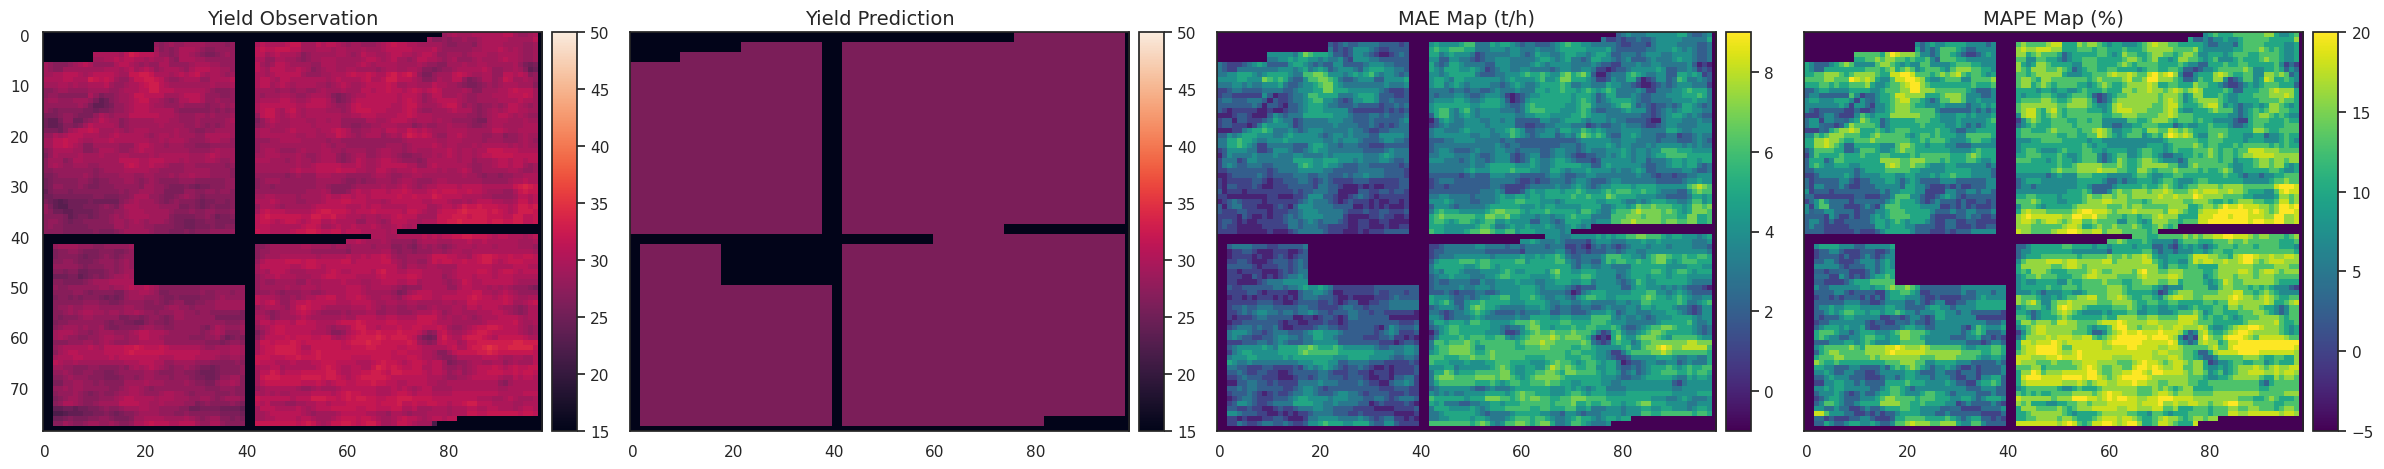

In [96]:
this_block_df, ytrue, ypred = inf.block_true_pred_mtx(ViT_vanilla_test, 52017)
_ = inf.yield_true_pred_plot(ytrue, ypred, min_v = 15, max_v = 50)